# Incredible. Observe greatness

## The Beginning

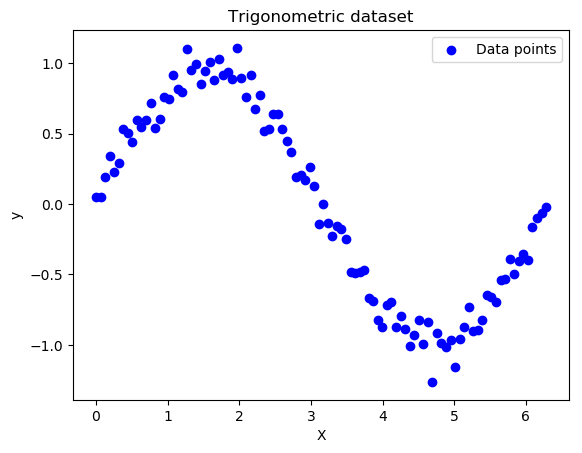

c:\Users\matth\miniconda3\envs\datasci\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.651e+00, tolerance: 3.690e-03
  model = cd_fast.enet_coordinate_descent(


Training MSE: 0.038
Testing MSE: 0.066
Training R^2: 0.917
Testing R^2: 0.882


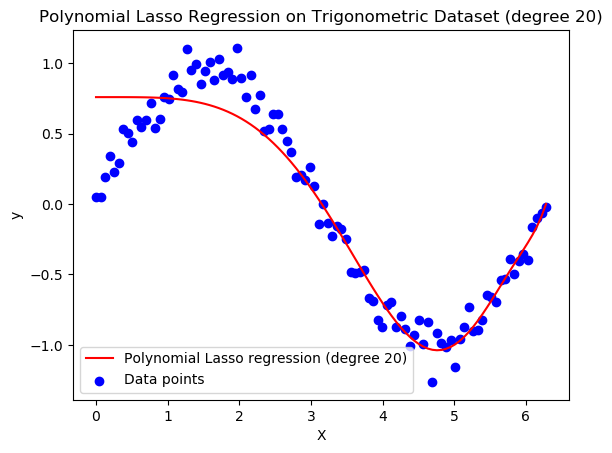

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Generate a trigonometric dataset
np.random.seed(42)  # For reproducibility

# Generate 100 data points
X = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
y = np.sin(X).ravel() + 0.1 * np.random.randn(100)

# Plot the dataset
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Trigonometric dataset')
plt.legend()
plt.show()

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Transform the features using polynomial features
degree = 20
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Step 4: Fit the Lasso regression model on polynomial features
lasso = Lasso(alpha=0.1, max_iter=10000)  # You can tune the alpha parameter
lasso.fit(X_train_poly, y_train)

# Step 5: Make predictions and evaluate the model
y_train_pred = lasso.predict(X_train_poly)
y_test_pred = lasso.predict(X_test_poly)

# Calculate mean squared error and R^2 score
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'Training MSE: {mse_train:.3f}')
print(f'Testing MSE: {mse_test:.3f}')
print(f'Training R^2: {r2_train:.3f}')
print(f'Testing R^2: {r2_test:.3f}')

# Step 6: Plot the results
X_poly = poly_features.transform(X)
y_poly_pred = lasso.predict(X_poly)

plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_poly_pred, color='red', label=f'Polynomial Lasso regression (degree {degree})')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Polynomial Lasso Regression on Trigonometric Dataset (degree {degree})')
plt.legend()
plt.show()